# Part V. CIFAR-10 open-ended challenge

In this section, you can experiment with whatever ConvNet architecture you'd like on CIFAR-10. 

Now it's your job to experiment with architectures, hyperparameters, loss functions, and optimizers to train a model that achieves **at least 70%** accuracy on the CIFAR-10 **validation** set within 10 epochs. You can use the check_accuracy and train functions from above. You can use either `nn.Module` or `nn.Sequential` API. 

Describe what you did at the end of this notebook.

Here are the official API documentation for each component. One note: what we call in the class "spatial batch norm" is called "BatchNorm2D" in PyTorch.

* Layers in torch.nn package: http://pytorch.org/docs/stable/nn.html
* Activations: http://pytorch.org/docs/stable/nn.html#non-linear-activations
* Loss functions: http://pytorch.org/docs/stable/nn.html#loss-functions
* Optimizers: http://pytorch.org/docs/stable/optim.html


### Things you might try:
- **Filter size**: Above we used 5x5; would smaller filters be more efficient?
- **Number of filters**: Above we used 32 filters. Do more or fewer do better?
- **Pooling vs Strided Convolution**: Do you use max pooling or just stride convolutions?
- **Batch normalization**: Try adding spatial batch normalization after convolution layers and vanilla batch normalization after affine layers. Do your networks train faster?
- **Network architecture**: The network above has two layers of trainable parameters. Can you do better with a deep network? Good architectures to try include:
    - [conv-relu-pool]xN -> [affine]xM -> [softmax or SVM]
    - [conv-relu-conv-relu-pool]xN -> [affine]xM -> [softmax or SVM]
    - [batchnorm-relu-conv]xN -> [affine]xM -> [softmax or SVM]
- **Global Average Pooling**: Instead of flattening and then having multiple affine layers, perform convolutions until your image gets small (7x7 or so) and then perform an average pooling operation to get to a 1x1 image picture (1, 1 , Filter#), which is then reshaped into a (Filter#) vector. This is used in [Google's Inception Network](https://arxiv.org/abs/1512.00567) (See Table 1 for their architecture).
- **Regularization**: Add l2 weight regularization, or perhaps use Dropout.

### Tips for training
For each network architecture that you try, you should tune the learning rate and other hyperparameters. When doing this there are a couple important things to keep in mind:

- If the parameters are working well, you should see improvement within a few hundred iterations
- Remember the coarse-to-fine approach for hyperparameter tuning: start by testing a large range of hyperparameters for just a few training iterations to find the combinations of parameters that are working at all.
- Once you have found some sets of parameters that seem to work, search more finely around these parameters. You may need to train for more epochs.
- You should use the validation set for hyperparameter search, and save your test set for evaluating your architecture on the best parameters as selected by the validation set.

### Going above and beyond
If you are feeling adventurous there are many other features you can implement to try and improve your performance. You are **not required** to implement any of these, but don't miss the fun if you have time!

- Alternative optimizers: you can try Adam, Adagrad, RMSprop, etc.
- Alternative activation functions such as leaky ReLU, parametric ReLU, ELU, or MaxOut.
- Model ensembles
- Data augmentation
- New Architectures
  - [ResNets](https://arxiv.org/abs/1512.03385) where the input from the previous layer is added to the output.
  - [DenseNets](https://arxiv.org/abs/1608.06993) where inputs into previous layers are concatenated together.
  - [This blog has an in-depth overview](https://chatbotslife.com/resnets-highwaynets-and-densenets-oh-my-9bb15918ee32)

### Have fun and happy training! 

In [5]:
from cs231n.train_utils import *
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F  # useful stateless functions

import numpy as np
import matplotlib.pyplot as plt
    
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

NUM_TRAIN = 49000

# The torchvision.transforms package provides tools for preprocessing data
# and for performing data augmentation; here we set up a transform to
# preprocess the data by subtracting the mean RGB value and dividing by the
# standard deviation of each RGB value; we've hardcoded the mean and std.
transform = T.Compose([
                T.ToTensor(),
                T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
            ])

# We set up a Dataset object for each split (train / val / test); Datasets load
# training examples one at a time, so we wrap each Dataset in a DataLoader which
# iterates through the Dataset and forms minibatches. We divide the CIFAR-10
# training set into train and val sets by passing a Sampler object to the
# DataLoader telling how it should sample from the underlying Dataset.
cifar10_train = dset.CIFAR10('./cs231n/datasets', train=True, download=True,
                             transform=transform)
loader_train = DataLoader(cifar10_train, batch_size=64, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

cifar10_val = dset.CIFAR10('./cs231n/datasets', train=True, download=True,
                           transform=transform)
loader_val = DataLoader(cifar10_val, batch_size=64, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 50000)))

cifar10_test = dset.CIFAR10('./cs231n/datasets', train=False, download=True, 
                            transform=transform)
loader_test = DataLoader(cifar10_test, batch_size=64)

using device: cuda
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


TRAINING MODEL: 
It 0, loss = 2.3000
Train acc 	= 11.89
Val acc 	= 13.00

It 100, loss = 1.6771
Train acc 	= 42.97
Val acc 	= 43.30

It 101, loss = 1.5623
Train acc 	= 45.31
Val acc 	= 43.10



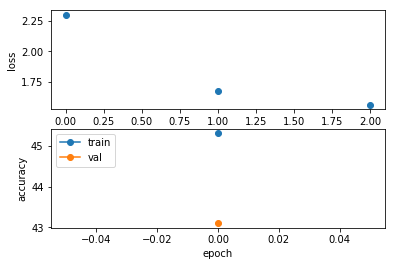

TRAINING MODEL: 
It 0, loss = 1.6011
Train acc 	= 43.58
Val acc 	= 43.90

It 100, loss = 1.5779
Train acc 	= 48.35
Val acc 	= 44.70

It 101, loss = 1.4912
Train acc 	= 49.39
Val acc 	= 46.30



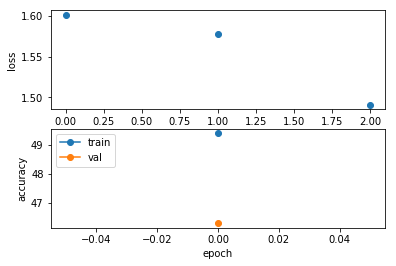

TRAINING MODEL: 
It 0, loss = 1.4306
Train acc 	= 52.00
Val acc 	= 47.20

It 100, loss = 1.4065
Train acc 	= 53.47
Val acc 	= 51.00

It 200, loss = 1.7652
Train acc 	= 52.34
Val acc 	= 51.20

It 300, loss = 1.3220
Train acc 	= 59.29
Val acc 	= 56.30

It 400, loss = 1.2596
Train acc 	= 60.76
Val acc 	= 55.90

It 500, loss = 1.4513
Train acc 	= 60.76
Val acc 	= 57.50

It 600, loss = 1.2370
Train acc 	= 62.93
Val acc 	= 59.40

It 700, loss = 1.6095
Train acc 	= 62.85
Val acc 	= 58.30

It 0, loss = 0.9343
Train acc 	= 66.06
Val acc 	= 58.20

It 100, loss = 1.1376
Train acc 	= 66.15
Val acc 	= 59.10

It 200, loss = 0.8296
Train acc 	= 67.10
Val acc 	= 60.20

It 300, loss = 1.0262
Train acc 	= 68.23
Val acc 	= 59.80

It 400, loss = 0.8181
Train acc 	= 68.49
Val acc 	= 60.30

It 500, loss = 1.2544
Train acc 	= 72.14
Val acc 	= 60.70

It 600, loss = 0.9816
Train acc 	= 70.14
Val acc 	= 62.10

It 700, loss = 1.0542
Train acc 	= 70.49
Val acc 	= 61.70

It 0, loss = 1.2520
Train acc 	= 72.31
Val 

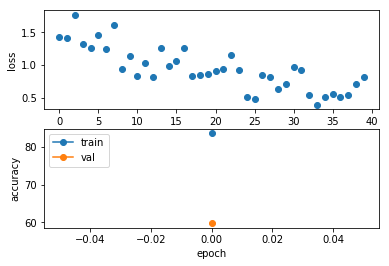

In [23]:
################################################################################
# TODO:                                                                        #         
# Experiment with any architectures, optimizers, and hyperparameters.          #
# Achieve AT LEAST 70% accuracy on the *validation set* within 10 epochs.      #
#                                                                              #
# Note that you can use the check_accuracy function to evaluate on either      #
# the test set or the validation set, by passing either loader_test or         #
# loader_val as the second argument to check_accuracy. You should not touch    #
# the test set until you have finished your architecture and  hyperparameter   #
# tuning, and only run the test set once at the end to report a final value.   #
################################################################################

def plot(history):
    plt.subplot(2, 1, 1)
    plt.plot(history.losses, 'o')
    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.subplot(2, 1, 2)
    plt.plot(history.train_acc, '-o')
    plt.plot(history.val_acc, '-o')
    plt.legend(['train', 'val'], loc='upper left')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.show()

im_shape = (3, 32, 32)
num_classes = 10

samplers = {
    "Architecture": ChoiceSampler(["conv-relu-pool",
                                   "batchnorm-relu-conv"]),
    "FilterSize": ChoiceSampler([3, 5]),
    "FilterCount": ChoiceSampler([8, 32, 128]),
    "Stride": ChoiceSampler([1, 2]),
    "N": ChoiceSampler([3, 5, 10]),
    "M": ChoiceSampler([0, 2]),
    "Dropout": ChoiceSampler([0.25, 0.5, 0.95])
}

sampler = SetSampler(samplers, active=10, course_its=100, fine_epochs=5)
results = []
while True:
    parameters = sampler.sample_parameters()
    model = construct_model(parameters, im_shape)
    history = train(model, loader_train, loader_val)
    #optimizer = optim.SGD(model.parameters(), lr=parameters["LearningRate"], momentum=0.9, nesterov=True)
    #history = train(model, optimizer, loader_train, loader_val, epochs=epochs, its=its, eval_its=16)
    sampler.update(parameters, history, model)
    #master.save()
    #best = master.get_best()
    #print("best model acc = %.2f" % best.acc)
    plot(history)
    results.append((history.val_acc, history, model))


################################################################################
#                                 END OF YOUR CODE                             
################################################################################

## Describe what you did 

In the cell below you should write an explanation of what you did, any additional features that you implemented, and/or any graphs that you made in the process of training and evaluating your network.

TODO: Describe what you did

## Test set -- run this only once

Now that we've gotten a result we're happy with, we test our final model on the test set (which you should store in best_model). Think about how this compares to your validation set accuracy.

In [ ]:
best_model = model
check_accuracy_part34(loader_test, best_model)